In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

# Load Dataset

In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step


# Dataset Normalize

In [3]:
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

# MLP with one output neuron

In [4]:
# define model using two dense (fully connected) layers
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=1))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,433 (1.54 MB)

 Trainable params: 402,433 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# compile model by:
# A loss function – to measure performance on the training data, to steer in the right direction
# An optimizer – to update the network
model.compile(loss='mse', optimizer='adam')

In [9]:
# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=5,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
7
[6.77]


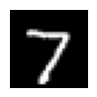

2
[2.75]


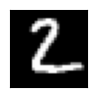

1
[1.36]


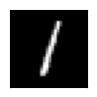

0
[0.16]


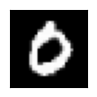

4
[4.31]


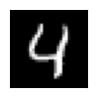

1
[0.71]


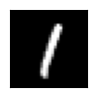

4
[5.12]


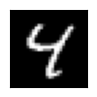

9
[7.57]


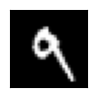

5
[6.39]


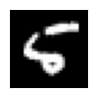

In [10]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(9):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [12]:
accuracy = np.average(np.round(y_pred[:, 0]) == y_test) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 62.980000000000004 %


In [13]:
np.min(y_pred)

np.float32(-1.4936415)

# MLP with categorical output

In [14]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

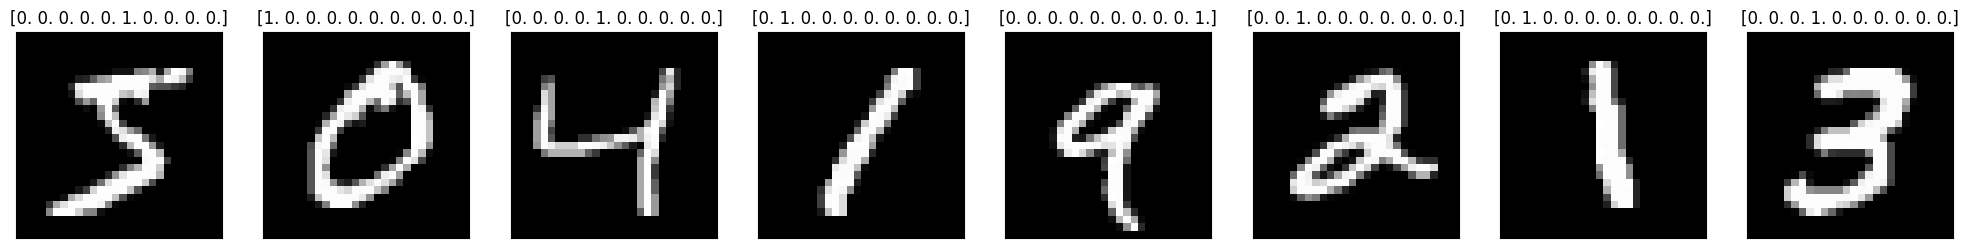

In [15]:
# show dataset
plt.figure(figsize=(25,4))
for i in range(8):
  plt.subplot(1,8,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(str(y_train[i]))

In [16]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# compile model
model.compile(loss='mse', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=5,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[-0.02 -0.03 -0.    0.04  0.01  0.01  0.02  0.91 -0.01  0.01]


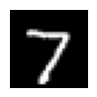

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[ 0.03 -0.04  1.08 -0.05  0.02 -0.05  0.03 -0.04  0.07 -0.03]


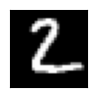

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[-0.01  1.01 -0.03  0.03  0.04 -0.02  0.   -0.05  0.04 -0.04]


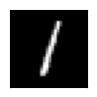

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 8.63e-01  3.51e-04  4.74e-02  2.15e-04  2.81e-02  2.74e-02  3.54e-02  5.13e-03 -2.23e-02  3.94e-03]


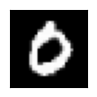

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[-0.01  0.01 -0.02  0.01  1.02 -0.02 -0.04  0.06 -0.01 -0.05]


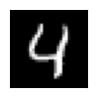

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[-0.02  1.08  0.01  0.02  0.01 -0.02 -0.   -0.05 -0.02 -0.04]


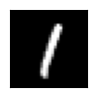

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[-0.01 -0.   -0.02 -0.01  0.86 -0.02 -0.02 -0.03  0.23 -0.06]


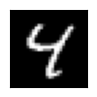

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[ 0.06  0.02  0.13  0.09  0.1   0.   -0.09  0.   -0.09  0.72]


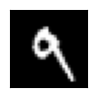

In [18]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [19]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 98.09 %


# Add sigmoid activation

In [20]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# compile model
model.compile(loss='mse', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=4,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[2.18e-04 7.54e-07 9.97e-05 2.35e-03 6.93e-07 1.15e-04 3.50e-07 9.99e-01 7.28e-05 1.78e-05]


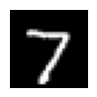

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1.63e-04 1.14e-04 9.86e-01 1.81e-03 3.16e-11 9.62e-04 2.31e-04 6.25e-11 8.33e-05 3.72e-11]


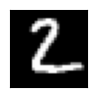

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.76e-04 9.75e-01 4.76e-03 4.90e-04 2.87e-03 2.02e-02 2.44e-03 4.32e-03 3.48e-03 6.53e-04]


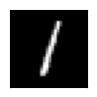

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.90e-01 1.41e-04 3.57e-04 2.47e-03 1.09e-04 6.06e-04 2.76e-04 1.35e-03 3.97e-07 8.94e-05]


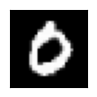

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.26e-04 5.85e-04 1.09e-03 2.27e-05 9.81e-01 1.12e-03 8.29e-04 5.72e-03 6.71e-04 2.58e-02]


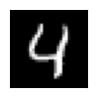

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[5.11e-05 9.95e-01 2.97e-04 3.43e-04 3.10e-03 1.07e-03 7.72e-05 1.62e-02 7.85e-04 7.94e-04]


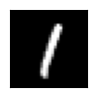

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[3.67e-06 1.38e-04 3.59e-05 1.75e-05 9.84e-01 4.01e-04 9.46e-06 2.39e-03 1.03e-02 5.65e-03]


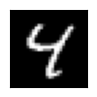

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.56e-05 3.57e-04 4.56e-02 8.76e-03 1.05e-02 3.08e-03 4.73e-05 6.61e-03 2.44e-04 9.66e-01]


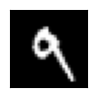

In [22]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [25]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 97.81 %


# Add softmax activation

In [26]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# compile model
model.compile(loss='mse', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=4,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.16e-06 1.23e-09 1.65e-05 6.07e-05 5.27e-10 3.46e-08 1.20e-10 1.00e+00 9.23e-07 8.51e-06]


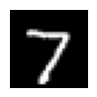

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2.51e-07 4.05e-04 9.99e-01 1.17e-04 2.48e-11 1.70e-06 1.90e-06 3.61e-11 4.48e-05 2.40e-11]


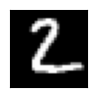

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.47e-04 9.92e-01 1.22e-03 1.02e-04 2.21e-03 2.76e-04 5.56e-04 1.87e-03 1.58e-03 1.40e-04]


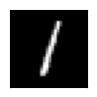

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.00e+00 1.90e-07 8.58e-05 2.09e-06 1.83e-06 2.59e-06 1.38e-04 4.46e-05 1.89e-07 7.43e-06]


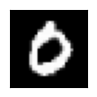

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[9.73e-05 4.34e-06 8.51e-06 2.70e-07 9.89e-01 1.95e-06 2.63e-05 8.52e-05 8.96e-06 1.09e-02]


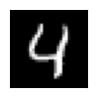

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.97e-05 9.97e-01 8.67e-05 8.69e-06 6.38e-04 2.47e-06 1.49e-05 1.66e-03 2.42e-04 2.34e-05]


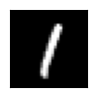

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.59e-06 3.97e-06 5.40e-06 1.11e-06 9.96e-01 1.29e-05 1.21e-05 2.91e-04 2.26e-03 1.27e-03]


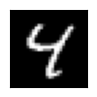

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3.73e-06 1.41e-04 8.67e-04 6.07e-03 8.41e-04 1.01e-03 4.48e-07 1.03e-03 1.15e-04 9.90e-01]


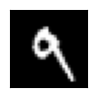

In [28]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [29]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 97.76 %


# Use cross entropy loss

In [30]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=4,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.51e-07 4.07e-08 1.46e-05 1.53e-04 2.36e-10 5.55e-07 4.96e-11 1.00e+00 1.01e-06 1.15e-06]


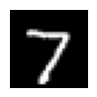

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1.19e-07 4.65e-05 1.00e+00 2.41e-06 3.68e-13 2.18e-07 1.13e-08 1.24e-12 1.36e-07 7.89e-11]


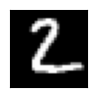

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.92e-06 9.98e-01 3.03e-04 3.83e-05 1.51e-04 9.16e-05 5.17e-05 1.38e-03 3.49e-04 5.10e-06]


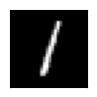

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.99e-01 5.75e-07 3.07e-04 1.84e-06 1.63e-06 5.58e-06 2.13e-05 8.95e-04 4.42e-08 1.81e-05]


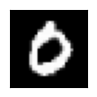

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[3.35e-07 5.62e-09 9.51e-07 4.51e-09 1.00e+00 6.41e-08 2.05e-06 2.05e-05 3.05e-06 2.66e-04]


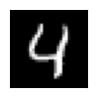

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.22e-07 9.98e-01 5.92e-06 4.80e-06 1.98e-05 1.31e-06 1.92e-07 2.19e-03 2.45e-05 1.03e-06]


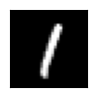

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.17e-09 2.21e-06 1.94e-06 1.52e-07 9.98e-01 4.40e-06 2.03e-06 1.04e-04 1.40e-03 5.44e-05]


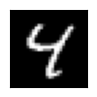

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3.97e-08 1.54e-06 1.06e-04 4.49e-04 1.98e-03 2.54e-05 2.17e-09 2.44e-04 3.01e-06 9.97e-01]


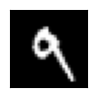

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1.73e-06 2.45e-06 6.69e-04 2.58e-05 1.24e-03 6.49e-01 3.43e-01 2.71e-06 5.65e-03 3.11e-04]


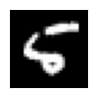

In [32]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(9):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [33]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 97.82 %


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[3.84e-05 2.84e-07 3.15e-07 4.25e-07 8.84e-08 9.44e-01 5.57e-02 8.82e-10 5.65e-05 2.27e-08]


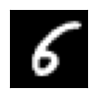

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.31e-05 2.73e-05 9.58e-01 3.33e-04 5.35e-03 8.04e-04 3.50e-02 7.58e-05 1.14e-05 5.26e-08]


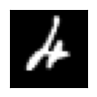

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2.02e-05 2.52e-04 2.29e-01 3.10e-02 4.00e-10 3.31e-05 2.08e-08 7.38e-01 2.00e-03 1.27e-04]


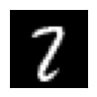

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1.04e-07 2.85e-04 7.19e-06 7.95e-01 6.24e-08 2.05e-01 2.21e-06 2.46e-07 5.74e-06 1.15e-05]


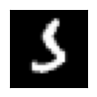

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[2.21e-05 1.53e-03 2.30e-03 4.39e-02 5.73e-06 1.10e-05 7.71e-07 9.52e-01 2.07e-05 5.03e-05]


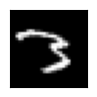

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[7.38e-01 1.11e-07 4.21e-05 3.02e-06 3.36e-06 1.50e-02 2.44e-01 3.18e-03 4.85e-05 3.26e-05]


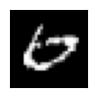

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[2.12e-10 4.88e-05 3.16e-06 4.32e-01 9.98e-12 5.68e-01 9.48e-11 3.80e-08 7.60e-08 5.83e-08]


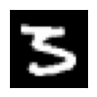

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[3.01e-02 5.87e-07 8.97e-01 1.31e-02 1.22e-04 4.97e-04 1.61e-03 4.49e-06 5.63e-02 1.13e-03]


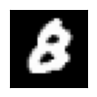

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1.41e-05 1.19e-02 9.44e-01 3.60e-02 1.77e-05 1.22e-05 7.12e-06 3.25e-06 8.34e-03 2.41e-06]


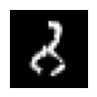

In [34]:
# show errors
idx = np.where(np.argmax(y_pred, axis=1) != np.argmax(y_test, axis=1))[0]
for i in idx[:9]:
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

Accuracy = 97.82 %
[[ 965    1    3    2    2    2    1    1    1    2]
 [   0 1125    4    0    0    1    2    1    2    0]
 [   1    0 1016    1    2    0    1    7    4    0]
 [   0    1    4  990    0    2    0    5    3    5]
 [   1    0    3    1  966    0    1    3    1    6]
 [   2    0    0   10    4  871    2    0    2    1]
 [   4    3    1    1    9   13  925    0    2    0]
 [   0    2   10    1    0    0    0 1009    2    4]
 [   3    0    3   10    5    8    0    2  940    3]
 [   1    6    0    4   12    2    0    8    1  975]]
[[9.85e-01 1.02e-03 3.06e-03 2.04e-03 2.04e-03 2.04e-03 1.02e-03 1.02e-03 1.02e-03 2.04e-03]
 [0.00e+00 9.91e-01 3.52e-03 0.00e+00 0.00e+00 8.81e-04 1.76e-03 8.81e-04 1.76e-03 0.00e+00]
 [9.69e-04 0.00e+00 9.84e-01 9.69e-04 1.94e-03 0.00e+00 9.69e-04 6.78e-03 3.88e-03 0.00e+00]
 [0.00e+00 9.90e-04 3.96e-03 9.80e-01 0.00e+00 1.98e-03 0.00e+00 4.95e-03 2.97e-03 4.95e-03]
 [1.02e-03 0.00e+00 3.05e-03 1.02e-03 9.84e-01 0.00e+00 1.02e-03 3.05e-03 1.02

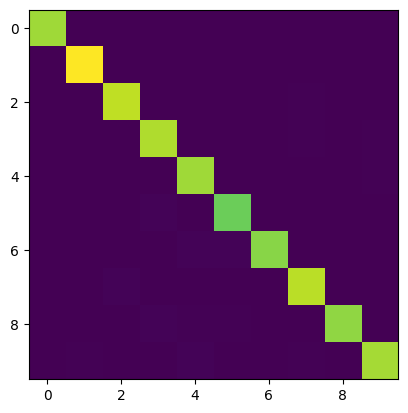

In [43]:
# plot confusion matrix
from sklearn import metrics

y_pred 
# = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print('Accuracy = {} %'.format(100 * np.sum(y_pred == y_true) / len(y_true)))

conf = metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)

conf_norm = metrics.confusion_matrix(y_true, y_pred, normalize='true')
print(conf_norm)


In [57]:
import os

# Define folder
folder = r"D:\Projects\AIMaster\Neural-Computing-and-Deep-Learning\MNIST_Project"

# Create it if missing
os.makedirs(folder, exist_ok=True)

# serialize model to JSON
model_json = model.to_json()
with open(os.path.join(folder, "model.json"), "w") as json_file:
    json_file.write(model_json)

# serialize weights to TensorFlow-native format
model.save(os.path.join(folder, "model.keras"))
print("Saved model to disk")

Saved model to disk


In [60]:
# load json and create model
json_file = open(os.path.join(folder, "model.json"), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights(os.path.join(folder, "model.keras"))
print("Loaded model from disk")

Loaded model from disk
